# Semi-Analytic Solutions for Simple Structures

## Simply-Supported Rectangular Plates

In [1]:
import numpy as np

from sigmaepsilon.mesh.grid import grid
from sigmaepsilon.mesh.trimesh import triangulate
from sigmaepsilon.mesh.utils.topology.tr import Q4_to_T3

from sigmaepsilon.solid.fourier import (
    RectangularPlate,
    LoadGroup,
    PointLoad,
    RectangleLoad,
)

size = Lx, Ly = (600.0, 800.0)
E = 2890.0
nu = 0.2
t = 25.0

G = E / 2 / (1 + nu)
D = (
    np.array([[1, nu, 0], [nu, 1, 0], [0.0, 0, (1 - nu) / 2]])
    * t**3
    * (E / (1 - nu**2))
    / 12
)
S = np.array([[G, 0], [0, G]]) * t * 5 / 6

loads = LoadGroup(
    LG1=LoadGroup(
        LC1=RectangleLoad(x=[[0, 0], [Lx, Ly]], v=[-0.1, 0, 0]),
        LC2=RectangleLoad(x=[[Lx / 3, Ly / 2], [Lx / 2, 2 * Ly / 3]], v=[-1, 0, 0]),
    ),
    LG2=LoadGroup(
        LC3=PointLoad(x=[Lx / 3, Ly / 2], v=[-100.0, 0, 0]),
        LC4=PointLoad(x=[2 * Lx / 3, Ly / 2], v=[100.0, 0, 0]),
    ),
)
loads.lock()

shape = nx, ny = (30, 40)
gridparams = {"size": size, "shape": shape, "eshape": "Q4"}
coords_, topo = grid(**gridparams)
coords = np.zeros((coords_.shape[0], 3))
coords[:, :2] = coords_[:, :]
del coords_
coords, triangles = Q4_to_T3(coords, topo)
triobj = triangulate(points=coords[:, :2], triangles=triangles)[-1]

#triobj = triangulate(size=size, shape=shape)[-1]
#mesh = PolyData(coords=coords, topo=triangles)

plate = RectangularPlate(size, (20, 20), D=D, S=S)
#plate = RectangularPlate(size, (20, 20), D=D)
results = plate.solve(loads, coords)

In [2]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sigmaepsilon.plotting.mpl.triplot import triplot

plt.style.use("default")


UZ, ROTX, ROTY, CX, CY, CXY, EXZ, EYZ, MX, MY, MXY, QX, QY = list(range(13))
labels = {
    UZ: "UZ",
    ROTX: "ROTX",
    ROTY: "ROTY",
    CX: "CX",
    CY: "CY",
    CXY: "CXY",
    EXZ: "EXZ",
    EYZ: "EYZ",
    MX: "MX",
    MY: "MY",
    MXY: "MXY",
    QX: "QX",
    QY: "QY",
}
ilabels = {k: i for i, k in enumerate(labels)}


def plot2d(res2d):
    fig = plt.figure(figsize=(8, 3))  # in inches
    fig.patch.set_facecolor("white")
    cmap = "jet"
    gs = gridspec.GridSpec(1, 3)
    for i, key in enumerate([UZ, ROTX, ROTY]):
        ikey = ilabels[key]
        ax = fig.add_subplot(gs[i])
        triplot(
            triobj,
            ax=ax,
            fig=fig,
            title=labels[key],
            data=res2d[:, ikey],
            cmap=cmap,
            axis="off",
            lw=0
        )
    fig.suptitle("Displacements", fontsize=16)
    fig.tight_layout()

    fig = plt.figure(figsize=(12, 3))  # in inches
    fig.patch.set_facecolor("white")
    cmap = "seismic"
    gs = gridspec.GridSpec(1, 5)
    for i, key in enumerate([CX, CY, CXY, EXZ, EYZ]):
        ikey = ilabels[key]
        ax = fig.add_subplot(gs[i])
        triplot(
            triobj,
            ax=ax,
            fig=fig,
            title=labels[key],
            data=res2d[:, ikey],
            cmap=cmap,
            axis="off",
            lw=0
        )
    fig.suptitle("Strains", fontsize=16)
    fig.tight_layout()
    
    fig = plt.figure(figsize=(12, 3))  # in inches
    fig.patch.set_facecolor("white")
    cmap = "seismic"
    gs = gridspec.GridSpec(1, 5)
    for i, key in enumerate([MX, MY, MXY, QX, QY]):
        ikey = ilabels[key]
        ax = fig.add_subplot(gs[i])
        triplot(
            triobj,
            ax=ax,
            fig=fig,
            title=labels[key],
            data=res2d[:, ikey],
            cmap=cmap,
            axis="off",
            lw=0
        )
    fig.suptitle("Internal forces and moments", fontsize=16)
    fig.tight_layout()

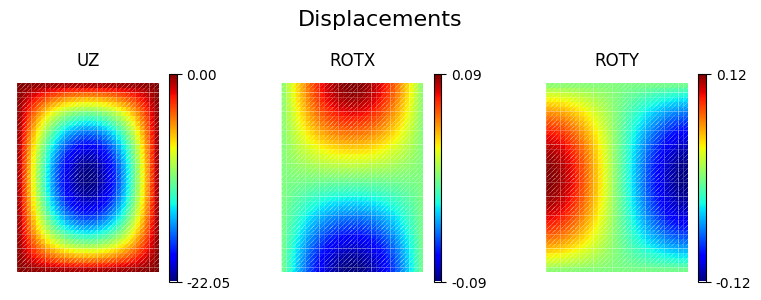

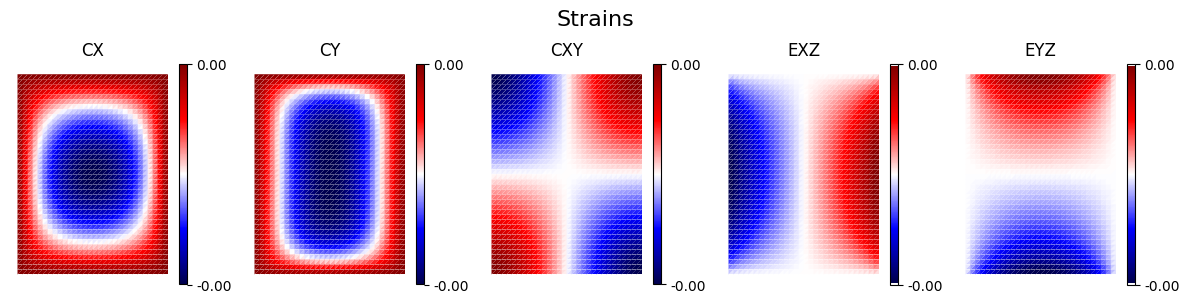

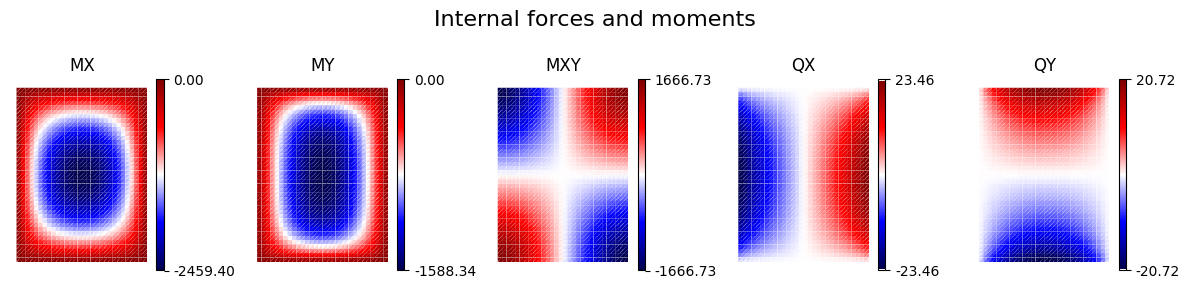

In [3]:
plot2d(results["LG1", "LC1"])

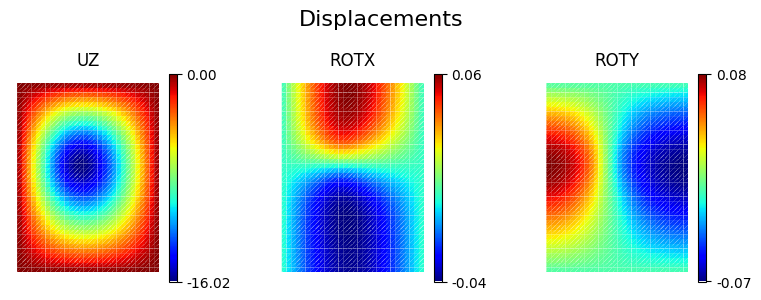

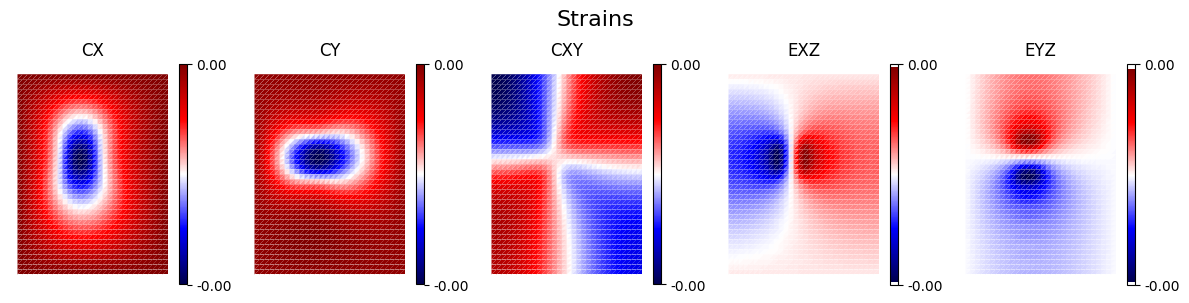

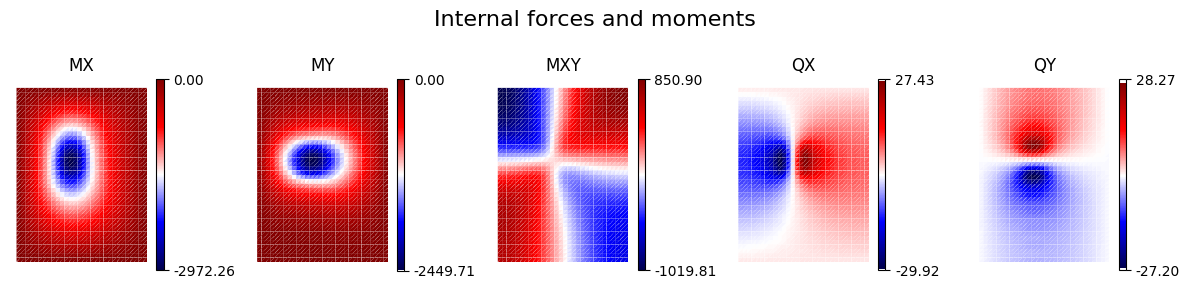

In [4]:
plot2d(results["LG1", "LC2"])

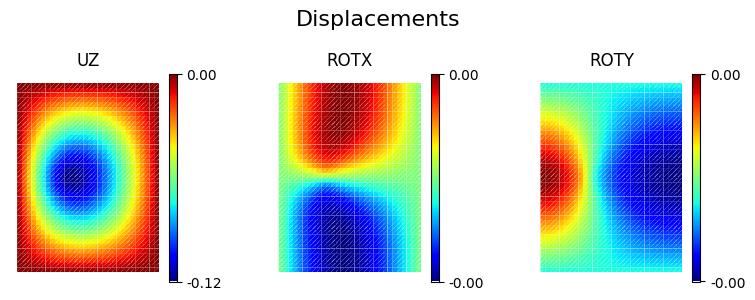

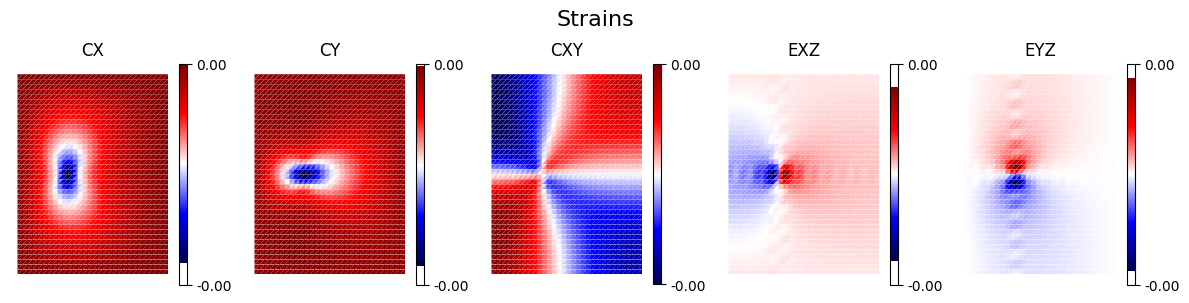

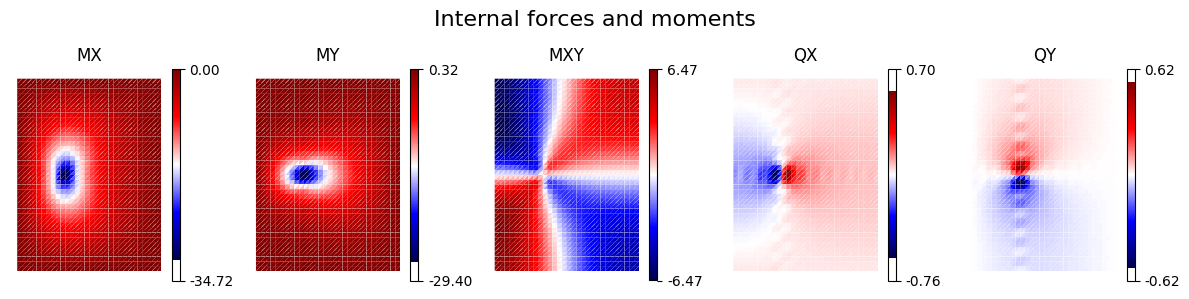

In [5]:
plot2d(results["LG2", "LC3"])

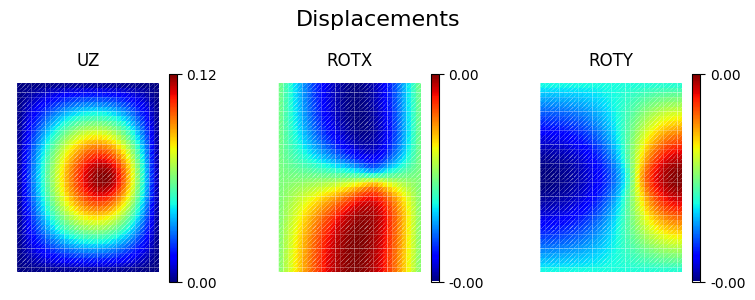

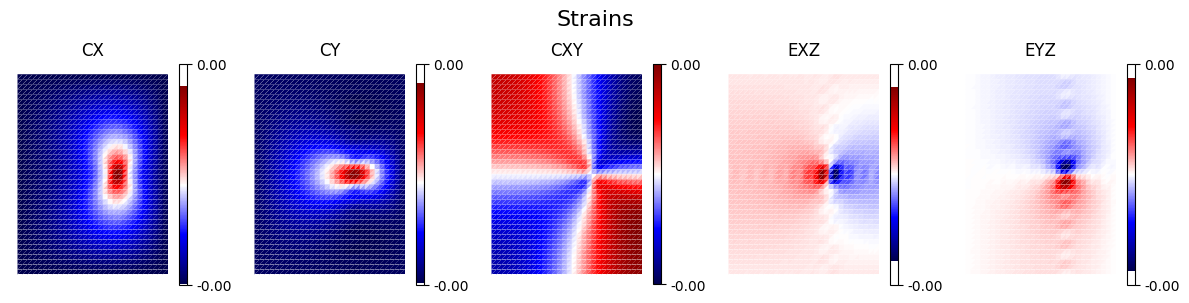

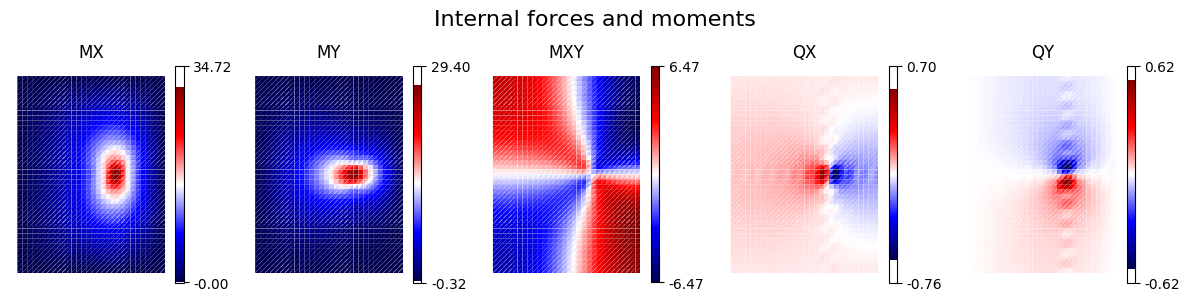

In [6]:
plot2d(results["LG2", "LC4"])